In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import LSTM, Dense

In [2]:
df = pd.read_csv("WATER_TREAT_23102020144712652.csv")
df

,VAR,Variable,COU,Country,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,TOTPUBSEW,Total public sewerage (% of resident populatio...,AUS,Australia,2017,2017,PC,Percentage,0,Units,NaN,NaN,92.69,NaN,NaN
1,TOTPUBSEW,Total public sewerage (% of resident populatio...,AUS,Australia,2018,2018,PC,Percentage,0,Units,NaN,NaN,92.64,NaN,NaN
2,TOTPUBSEW,Total public sewerage (% of resident populatio...,AUT,Austria,2018,2018,PC,Percentage,0,Units,NaN,NaN,100.00,NaN,NaN
3,TOTPUBSEW,Total public sewerage (% of resident populatio...,BEL,Belgium,2017,2017,PC,Percentage,0,Units,NaN,NaN,88.00,NaN,NaN
4,TOTPUBSEW,Total public sewerage (% of resident populatio...,CAN,Canada,2017,2017,PC,Percentage,0,Units,NaN,NaN,85.70,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,PUBNOTR,Connected to a wastewater treatment plant with...,AUS,Australia,2018,2018,PC,Percentage,0,Units,NaN,NaN,0.00,NaN,NaN
378,OTHERTR,Unspecified (other) treatment,AUS,Australia,2017,2017,PC,Percentage,0,Units,NaN,NaN,0.00,NaN,NaN
379,OTHERTR,Unspecified (other) treatment,AUS,Australia,2018,2018,PC,Percentage,0,Units,NaN,NaN,0.00,NaN,NaN
380,TOTTR,Total treatment ( = PUBTOTTR + INDEPDTR),AUS,Australia,2017,2017,PC,Percentage,0,Units,NaN,NaN,100.00,NaN,NaN


In [3]:
print(df.shape)
df = df.drop(df[df.Value == 0].index)
print(df.shape)

(382, 15)
(314, 15)


In [4]:
X = df.drop(columns=['Value'])
y = pd.DataFrame(df['Value'])

Text(0.5, 1.0, 'Distribution of Values')

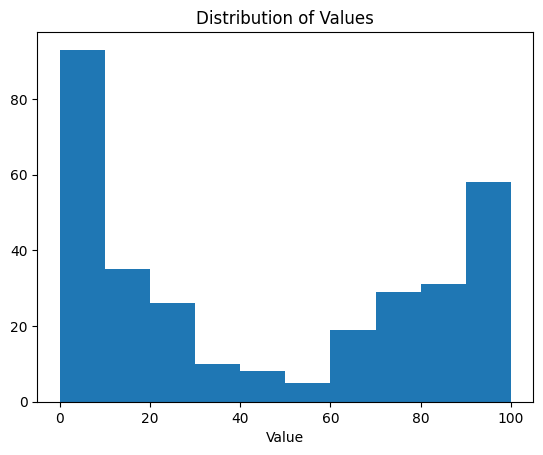

In [5]:
plt.hist(y)
plt.xlabel('Value')
plt.title('Distribution of Values')

In [6]:
y.value_counts()

Value     
100.000000    16
0.100000       7
0.500000       5
99.500000      4
14.000000      3
              ..
21.199997      1
21.220001      1
21.800000      1
23.200000      1
31.110000      1
Length: 242, dtype: int64

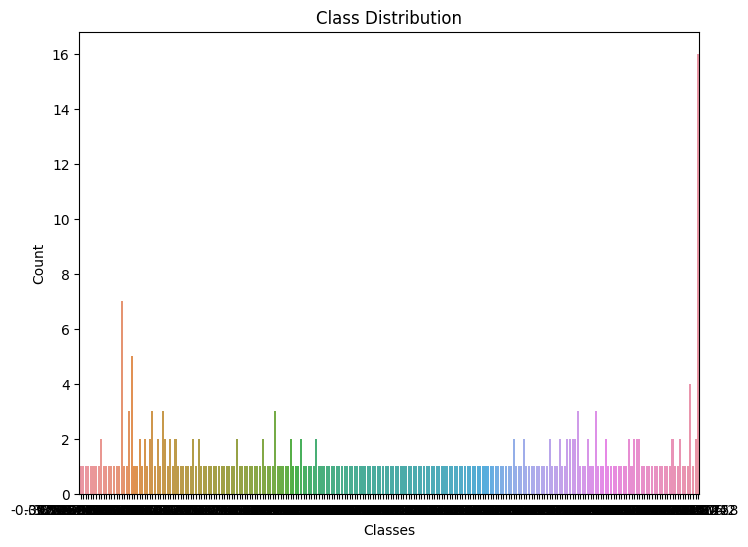

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Value')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# sns.barplot(x='VAR', y=y, data=X_train).tick_params(axis='both', labelsize=6, size=50)

In [10]:
# Training Data
X_train.isna().sum()

VAR                        0
Variable                   0
COU                        0
Country                    0
YEA                        0
Year                       0
Unit Code                  0
Unit                       0
PowerCode Code             0
PowerCode                  0
Reference Period Code    251
Reference Period         251
Flag Codes               228
Flags                    228
dtype: int64

In [11]:
X_train = X_train.drop(['Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'] ,axis = 1)
X_train.isna().sum()

VAR               0
Variable          0
COU               0
Country           0
YEA               0
Year              0
Unit Code         0
Unit              0
PowerCode Code    0
PowerCode         0
dtype: int64

In [12]:
X_train.drop_duplicates(inplace=True)

In [13]:
X_train.head()

,VAR,Variable,COU,Country,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode
143,PUBADVTR,Tertiary treatment,HUN,Hungary,2017,2017,PC,Percentage,0,Units
131,PUBBIOTR,Secondary treatment,SVN,Slovenia,2017,2017,PC,Percentage,0,Units
167,PUBADVTR,Tertiary treatment,SVN,Slovenia,2018,2018,PC,Percentage,0,Units
102,PUBBIOTR,Secondary treatment,CZE,Czech Republic,2017,2017,PC,Percentage,0,Units
123,PUBBIOTR,Secondary treatment,SVK,Slovak Republic,2017,2017,PC,Percentage,0,Units


In [14]:
# Selecting only the numerical columns
numerical_columns = X_train.select_dtypes(include=np.number)

z_scores = (numerical_columns - numerical_columns.mean()) / numerical_columns.std()

outliers = (z_scores.abs() > 3).any(axis=1)

outlier_rows = X_train[outliers]

print(outlier_rows)

X_train = X_train.drop(outlier_rows.index)

Empty DataFrame
Columns: [VAR, Variable, COU, Country, YEA, Year, Unit Code, Unit, PowerCode Code, PowerCode]
Index: []


In [15]:
columns_to_encode = ['VAR', 'Variable', 'COU', 'Country', 'YEA', 'Year', 'Unit Code', 'Unit', 'PowerCode']

label_encoder = LabelEncoder()

for column in X_train.columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])

X_train.head(100)

,VAR,Variable,COU,Country,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode
143,3,6,10,10,0,0,0,0,0,0
131,4,5,24,24,0,0,0,0,0,0
167,3,6,24,24,1,1,0,0,0,0
102,4,5,5,5,0,0,0,0,0,0
123,4,5,23,23,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
274,2,9,9,9,1,1,0,0,0,0
330,4,5,17,15,1,1,0,0,0,0
157,3,6,23,23,0,0,0,0,0,0
103,4,5,5,5,1,1,0,0,0,0


In [16]:
# Drop columns
X_test.isna().sum()
X_test = X_test.drop(['Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'] ,axis = 1)
X_test.isna().sum()

VAR               0
Variable          0
COU               0
Country           0
YEA               0
Year              0
Unit Code         0
Unit              0
PowerCode Code    0
PowerCode         0
dtype: int64

In [17]:
X_test.drop_duplicates(inplace=True)

In [18]:
numerical_columns_test = X_test.select_dtypes(include=np.number)

z_scores_test = (numerical_columns_test - numerical_columns_test.mean()) / numerical_columns_test.std()

outliers_test = (z_scores_test.abs() > 3).any(axis=1)

outlier_rows_test = X_test[outliers_test]

print(outlier_rows_test)

X_test = X_test.drop(outlier_rows_test.index)

Empty DataFrame
Columns: [VAR, Variable, COU, Country, YEA, Year, Unit Code, Unit, PowerCode Code, PowerCode]
Index: []


In [19]:
columns_to_encode = ['VAR', 'Variable', 'COU', 'Country', 'YEA', 'Year', 'Unit Code', 'Unit', 'PowerCode']

label_encoder = LabelEncoder()

for column in X_test.columns:
    X_test[column] = label_encoder.fit_transform(X_test[column])

X_test.head(100)

,VAR,Variable,COU,Country,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode
162,3,6,2,2,0,0,0,0,0,0
33,8,7,10,10,0,0,0,0,0,0
261,2,9,1,1,0,0,0,0,0,0
77,5,3,8,8,0,0,0,0,0,0
313,1,1,5,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
120,4,5,18,18,0,0,0,0,0,0
89,5,3,19,19,0,0,0,0,0,0
176,0,2,9,9,0,0,0,0,0,0
146,3,6,11,11,0,0,0,0,0,0


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Reshape data for LSTM and  gru (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [22]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(X_train_scaled.shape[1], )),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(1 ,activation='linear')  # Output layer
# ])

# model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
# model = tf.keras.Sequential()

# model.add(LSTM(64, input_shape=(X_train_scaled.shape[1], 1)))
# model.add(tf.keras.layers.BatchNormalization()),
# model.add(tf.keras.layers.Dense(64)),
# model.add(Dense(1))

# model.compile(optimizer='adam', loss='mean_squared_error')


In [24]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import kerastuner as kt

# Define a function to build the LSTM model with hyperparameters
def build_model(hp):
    model = keras.Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32),
                   activation=hp.Choice('activation', values=['relu', 'tanh']),
                   return_sequences=True,
                   input_shape=(1, X_train_scaled.shape[1])))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   activation=hp.Choice('activation', values=['relu', 'tanh'])))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mse',
                  metrics=['mse'])
    return model

# Define the tuner and search space
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of trials to run
    directory='my_tuning_directory',  # Directory to save results
    project_name='my_lstm_tuning'  # Name for this tuning project
)

# Perform hyperparameter tuning
tuner.search(X_train_reshaped, y_train, epochs=50, validation_data=(X_test_reshaped, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

INFO:tensorflow:Reloading Tuner from my_tuning_directory\my_lstm_tuning\tuner0.json


C:\Users\eslam\AppData\Local\Temp\ipykernel_3684\364101743.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


INFO:tensorflow:Oracle triggered exit


In [25]:
# # Reshape your data for LSTM (samples, time steps, features)
# X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
# X_test = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# # Train the model
# model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

best_model.fit(X_train_reshaped, y_train, epochs=100, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
8/8 [==============================] - 5s 113ms/step - loss: 3449.7891 - mse: 3449.7891 - val_loss: 2962.5217 - val_mse: 2962.5217
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 2613.0637 - mse: 2613.0637 - val_loss: 1227.9680 - val_mse: 1227.9680
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 1025.4993 - mse: 1025.4993 - val_loss: 803.4911 - val_mse: 803.4911
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 768.7823 - mse: 768.7823 - val_loss: 797.0469 - val_mse: 797.0469
Epoch 5/100
8/8 [==============================] - 0s 18ms/step - loss: 730.7629 - mse: 730.7629 - val_loss: 610.2119 - val_mse: 610.2119
Epoch 6/100
8/8 [==============================] - 0s 15ms/step - loss: 656.9390 - mse: 656.9390 - val_loss: 599.1628 - val_mse: 599.1628
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 613.0522 - mse: 613.0522 - val_loss: 607.6638 - val_mse: 607.6638
Epoch 8/100
8/8 [=======

In [26]:
# model.fit(X_train_scaled, y_train, epochs=50, batch_size=1, verbose=2)
# model.summary()

In [27]:
# y_pred = model.predict(X_test)

# loss = model.evaluate(X_test_scaled, y_test)
# print("Test Loss:", loss)

# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

In [28]:
# Evaluate the best model
y_pred = best_model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Best Model:", mse)

2/2 [==============================] - 1s 4ms/step
Mean Squared Error (MSE) for Best Model: 202.1729655422919


In [29]:
best_model.save("best_model.h5")

c:\Users\eslam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
